In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [25]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [26]:
print(X_train_full.shape, X_test.shape)
print(y_train_full.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [27]:
# Normalize data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [28]:
# Split a validation set from training data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(54000, 28, 28) (6000, 28, 28)
(54000,) (6000,)


In [29]:
# Prepare data for ANN
X_train_ann = X_train.reshape(-1, 28*28)
X_val_ann = X_val.reshape(-1, 28*28)
X_test_ann = X_test.reshape(-1, 28*28)


print(X_train_ann.shape, X_val_ann.shape,X_test_ann.shape)

(54000, 784) (6000, 784) (10000, 784)


In [30]:
# Prepare data for CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)


print(X_train_cnn.shape, X_val_cnn.shape,X_test_cnn.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (10000, 28, 28, 1)


In [31]:
# Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

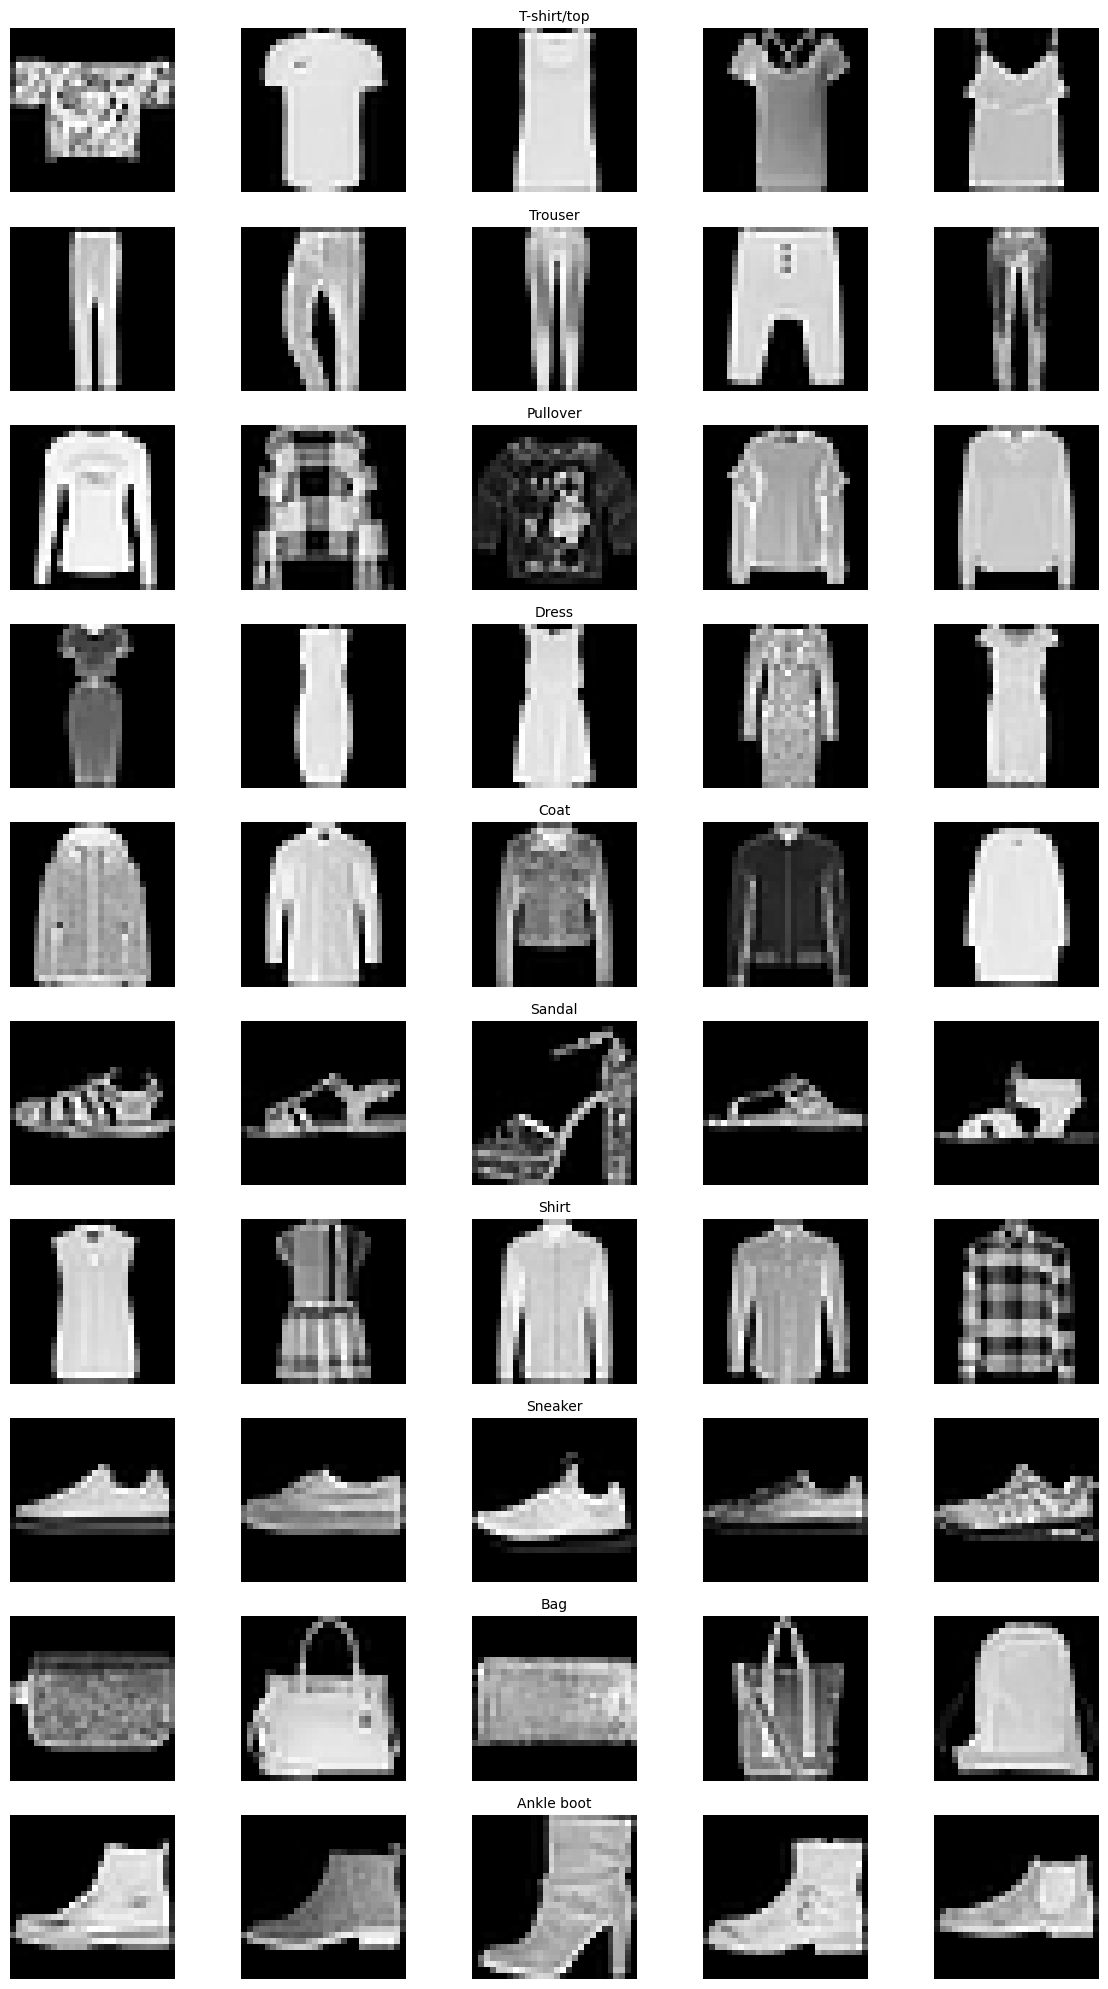

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Set up the figure
plt.figure(figsize=(12, 20))

# For each class, find 5 samples and plot
for class_index, class_name in enumerate(class_names):
    # Find indices for this class
    class_indices = np.where(y_train == class_index)[0][:5]
    
    for i, idx in enumerate(class_indices):
        plt_idx = class_index * 5 + i + 1
        plt.subplot(10, 5, plt_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.axis('off')
        if i == 2:  # Center image in row
            plt.title(class_name, fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
# Define ANN model
ann_model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:

# Train ANN model
history_ann = ann_model.fit(X_train_ann, y_train, epochs=10, validation_data=(X_val_ann, y_val), verbose=2)

Epoch 1/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8205 - loss: 0.5048 - val_accuracy: 0.8397 - val_loss: 0.4308
Epoch 2/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8641 - loss: 0.3755 - val_accuracy: 0.8657 - val_loss: 0.3574
Epoch 3/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8776 - loss: 0.3351 - val_accuracy: 0.8708 - val_loss: 0.3456
Epoch 4/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8860 - loss: 0.3105 - val_accuracy: 0.8830 - val_loss: 0.3302
Epoch 5/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8904 - loss: 0.2944 - val_accuracy: 0.8828 - val_loss: 0.3287
Epoch 6/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8975 - loss: 0.2772 - val_accuracy: 0.8758 - val_loss: 0.3404
Epoch 7/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8999 - loss: 0.2655 - val_accuracy: 0.8812 - val_loss: 0.3414
Epoch 8/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9039 - loss: 0.2575 - val_accuracy: 0.8812 - val_loss: 0.3296
Epoch 9/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9082 - loss: 0.2451 - val_accuracy: 0.8788 - 

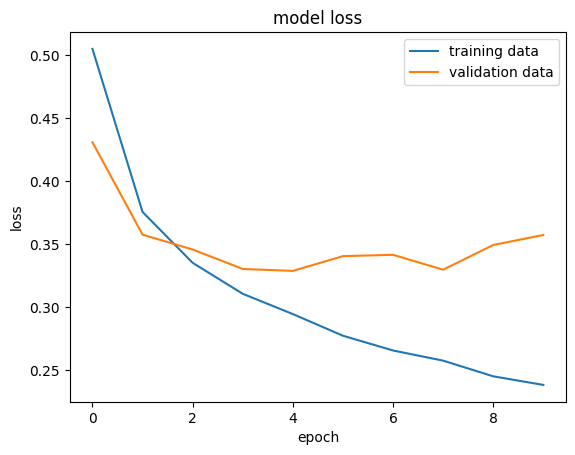

In [36]:
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

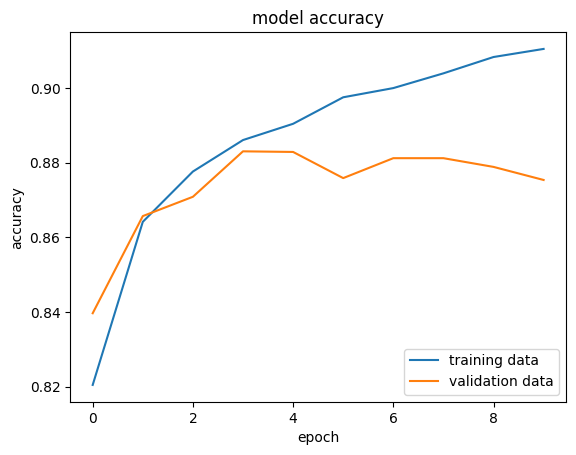

In [37]:
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [38]:
# Evaluate models on test data
ann_pred = np.argmax(ann_model.predict(X_test_ann), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
# ANN metrics
print("ANN Classification Report:")
print(classification_report(y_test, ann_pred, target_names=class_names))


ANN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.72      0.78      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.84      0.66      0.74      1000
      Sandal       0.99      0.92      0.95      1000
       Shirt       0.59      0.78      0.67      1000
     Sneaker       0.89      0.99      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



ANN Confusion Matrix:


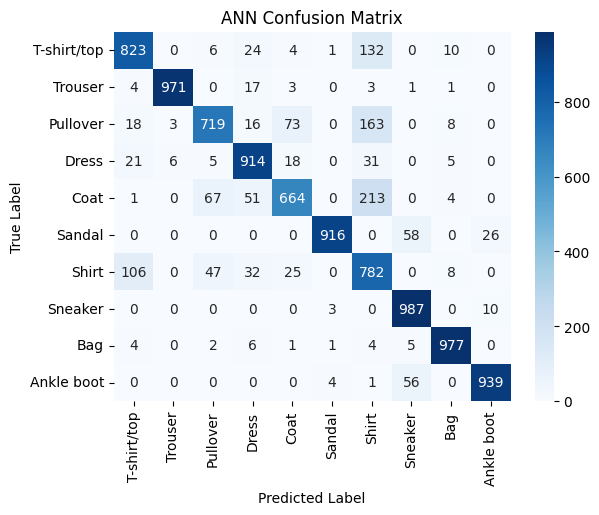

In [40]:
print("ANN Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("ANN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### **CNN MODEL**

In [41]:
# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
'''

Layer 1 : Conv2D(32, (3,3), activation='relu')
Input: (54000, 28, 28, 1)

Filter size: 3×3
Strides: 1 (default)
Padding: 'valid' (default) → no padding

Output size formula (valid):

Output Height/Width
= floor{ ((28 -3)/1) + 1} = 26

Output Height/Width=⌊ 
Output shape: (54000, 26, 26, 32)

Layer 2: MaxPooling2D(2, 2) 
Output Height/Width : floor { ((26 - 2)/ 2) + 1} = 13 
Output shape: (54000, 13, 13, 32)

Layer 3: Conv2D(64, (3,3), activation='relu')
Output size: { ((13 -3)/1) + 1} = 11
Output shape: (54000, 11, 11, 64)

Layer 4: MaxPooling2D(2,2)
Output shape: (54000, 5, 5, 64)

Layer 5: Flatten()
Input: (5, 5, 64)
Output shape: (54000, 1600)

Layer 6: Dense(128)
Input: (54000, 1600)
Output shape: (54000, 128)

Layer 7: Dense(10)
Output shape: (54000, 10)

'''

In [42]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val), verbose=2)


Epoch 1/10
1688/1688 - 9s - 5ms/step - accuracy: 0.8358 - loss: 0.4545 - val_accuracy: 0.8702 - val_loss: 0.3418
Epoch 2/10
1688/1688 - 3s - 2ms/step - accuracy: 0.8881 - loss: 0.3093 - val_accuracy: 0.8947 - val_loss: 0.2941
Epoch 3/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9046 - loss: 0.2601 - val_accuracy: 0.9037 - val_loss: 0.2680
Epoch 4/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9166 - loss: 0.2267 - val_accuracy: 0.8955 - val_loss: 0.2806
Epoch 5/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9258 - loss: 0.2004 - val_accuracy: 0.9053 - val_loss: 0.2541
Epoch 6/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9338 - loss: 0.1768 - val_accuracy: 0.9052 - val_loss: 0.2732
Epoch 7/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9410 - loss: 0.1538 - val_accuracy: 0.9112 - val_loss: 0.2552
Epoch 8/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9491 - loss: 0.1362 - val_accuracy: 0.9090 - val_loss: 0.2655
Epoch 9/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9546 - loss: 0.1194 - val_accuracy: 0.9067 - 

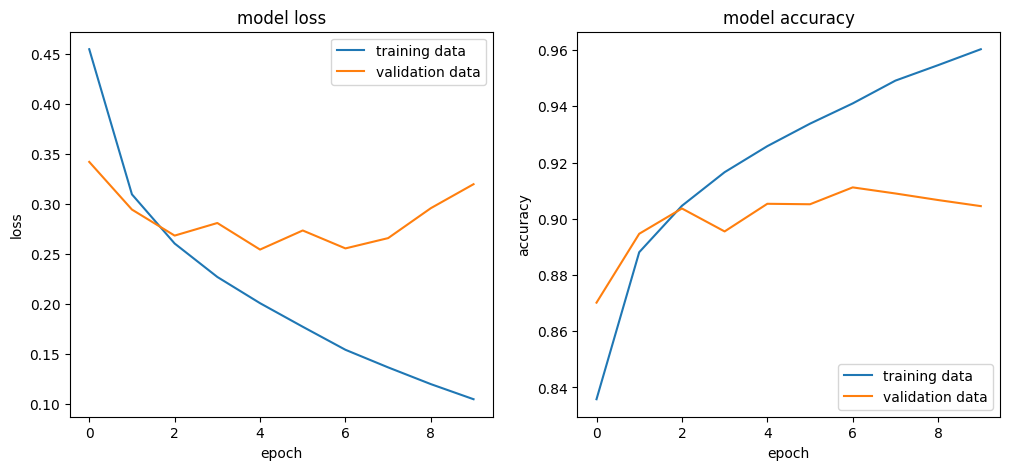

In [29]:

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')


# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')


In [47]:
# Evaluation on test data ..
cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [1]:
# CNN metrics
print("CNN Classification Report:")
print(classification_report(y_test, cnn_pred, target_names=class_names))



CNN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.79      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.89      0.80      0.84      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.86      0.85      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.65      0.81      0.72      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.94      0.99      0.96      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



CNN Confusion Matrix:


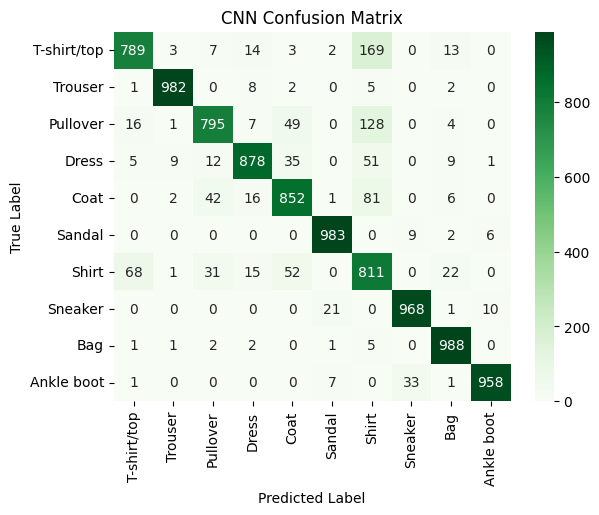

In [2]:
print("CNN Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, cnn_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **Hyperparameter Tuning Using Keras-Tuner**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.datasets import mnist

In [17]:
def build_model(hp: HyperParameters):
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(28, 28, 1)))
    
    # Number of convolutional layers
    conv_layers = hp.Int("conv_layers", min_value=1, max_value=4, step=1)
    
    for i in range(conv_layers):
        filters = hp.Int(f"filters_{i}", min_value=16, max_value=128, step=16)
        kernel_size = hp.Choice(f"kernel_size_{i}", values=[3, 5])
        stride = hp.Choice(f"stride_{i}", values=[1, 2])
        padding = hp.Choice(f"padding_{i}", values=["same", "valid"])
        activation = hp.Choice(f"conv_activation_{i}", values=["relu", "tanh", "elu", "selu", "gelu"])
        
        model.add(layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=stride,
                                padding=padding, activation=activation))

        # Ensure the spatial dimensions don't shrink too much after conv layer
        # Stop applying MaxPooling if the dimensions are too small
        if model.output_shape[1] <= 2 or model.output_shape[2] <= 2:
            break  
        
        if hp.Boolean(f"use_batchnorm_{i}"):
            model.add(layers.BatchNormalization())
        
        model.add(layers.MaxPooling2D(pool_size=2))
        
        if hp.Boolean(f"use_dropout_conv_{i}"):
            dropout_rate = hp.Float(f"dropout_rate_conv_{i}", min_value=0.1, max_value=0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Flatten())

    # Dense layers
    dense_layers = hp.Int("dense_layers", min_value=1, max_value=3, step=1)
    for j in range(dense_layers):
        units = hp.Int(f"dense_units_{j}", min_value=32, max_value=512, step=32)
        activation = hp.Choice(f"dense_activation_{j}", values=["relu", "tanh", "elu", "selu", "gelu"])
        
        model.add(layers.Dense(units=units, activation=activation))
        
        if hp.Boolean(f"use_dropout_dense_{j}"):
            dropout_rate = hp.Float(f"dropout_rate_dense_{j}", min_value=0.1, max_value=0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))
    
    # Output layer
    model.add(layers.Dense(10, activation="softmax"))
    
    # Optimizer selection
    optimizer_choice = hp.Choice("optimizer", values=["adam", "rmsprop", "sgd"])
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    
    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

### **1. Using RandomSearch Method**

In [18]:
# tuner for randommSearch
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=20,  # increase for deeper search
    executions_per_trial=1,
    directory="keras_tuner_dir",
    project_name="cnn_hyperparam_tuning"
)

In [20]:
# Search
tuner.search(X_train_cnn, y_train,
             epochs=10,
             validation_data=(X_val_cnn, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)])


In [21]:
# Get best model
best_model_RS = tuner.get_best_models(num_models=1)[0]
best_model_RS.summary()


# or we can use this also ..


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 288)                 │         779,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          55,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 192)                 │          37,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 873,738 (3.33 MB)

 Trainable params: 873,706 (3.33 MB)

 Non-trainable params: 32 (128.00 B)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train the best model
history_best_RS = best_model_RS.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val), verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9239 - loss: 0.2061 - val_accuracy: 0.9138 - val_loss: 0.2496
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9323 - loss: 0.1830 - val_accuracy: 0.9138 - val_loss: 0.2438
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9390 - loss: 0.1678 - val_accuracy: 0.9090 - val_loss: 0.2502
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9423 - loss: 0.1528 - val_accuracy: 0.9110 - val_loss: 0.2645
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9503 - loss: 0.1389 - val_accuracy: 0.9113 - val_loss: 0.2689
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9540 - loss: 0.1261 - val_accuracy: 0.9130 - val_loss: 0.2754
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9576 - loss: 0.1195 - val_accuracy: 0.9155 - val_loss: 0.2673
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1078 -

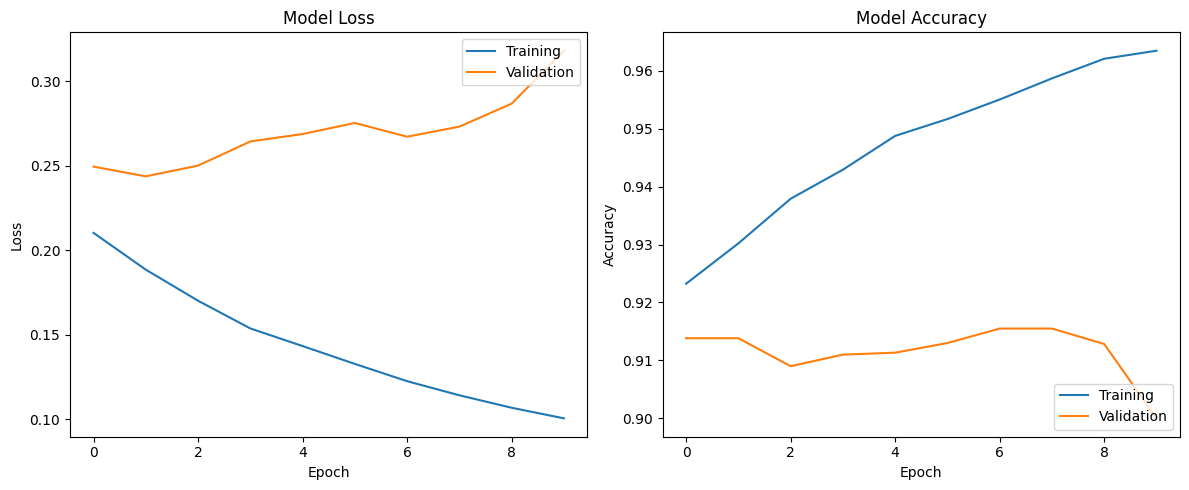

In [23]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_best_RS.history['loss'])
plt.plot(history_best_RS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_best_RS.history['accuracy'])
plt.plot(history_best_RS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()


In [27]:
# Evaluation on test data ..
cnn_pred_best_RS = np.argmax(best_model_RS.predict(X_test_cnn), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
# CNN metrics
print("CNN Classification Report:")
print(classification_report(y_test, cnn_pred_best_RS, target_names=class_names))


CNN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.77      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.77      0.83      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.83      0.86      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.65      0.85      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [ ]:
print("CNN RandomSearch Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, cnn_pred_best_RS), annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **2. Using BayesianOptimization Method**

In [ ]:
from kerastuner.tuners import BayesianOptimization
import tensorflow as tf

# tuner for Bayesian Optimization
bayes_tuner = BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=20,               # Number of total trials (models)
    num_initial_points=5,        # Initial random evaluations before Bayesian optimization starts
    executions_per_trial=1,
    directory="keras_tuner_dir",
    project_name="cnn_bayesian_optimization"
)

# Perform search
bayes_tuner.search(X_train_cnn, y_train,
                   epochs=10,
                   validation_data=(X_val_cnn, y_val),
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Retrieve best model
best_bayes_model = bayes_tuner.get_best_models(num_models=1)[0]
best_bayes_model.summary()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train the best model
history_best_bayse = best_bayes_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val), verbose=1)

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_best_bayse.history['loss'])
plt.plot(history_best_bayse.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_best_bayse.history['accuracy'])
plt.plot(history_best_bayse.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# Evaluation on test data ..
cnn_pred_best_bayse = np.argmax(best_bayes_model.predict(X_test_cnn), axis=1)

In [ ]:
# CNN metrics
print("CNN Classification Report:")
print(classification_report(y_test, cnn_pred_best_bayse, target_names=class_names))


In [ ]:
print("CNN RandomSearch Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, cnn_pred_best_bayse), annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **3. Using Hyperband Method**

In [ ]:
from kerastuner.tuners import Hyperband
import tensorflow as tf

# Define tuner for Hyperband
hyperband_tuner = Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,         # Total number of epochs per trial
    factor=3,              # Reduction factor for resource allocation
    executions_per_trial=1,
    directory="keras_tuner_dir",
    project_name="cnn_hyperband"
)

# Perform search
hyperband_tuner.search(X_train_cnn, y_train,
                       epochs=10,
                       validation_data=(X_val_cnn, y_val),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Retrieve best model
best_hyperband_model = hyperband_tuner.get_best_models(num_models=1)[0]
best_hyperband_model.summary()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train the best model
history_best_hyperband = best_hyperband_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val), verbose=1)

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_best_hyperband.history['loss'])
plt.plot(history_best_hyperband.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_best_hyperband.history['accuracy'])
plt.plot(history_best_hyperband.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# Evaluation on test data ..
cnn_pred_best_hyperband = np.argmax(best_hyperband_model.predict(X_test_cnn), axis=1)

In [ ]:
# CNN metrics
print("CNN Classification Report:")
print(classification_report(y_test, cnn_pred_best_hyperband, target_names=class_names))


In [ ]:
print("CNN RandomSearch Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, cnn_pred_best_hyperband), annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### **Custom Pipeline To switch between Methods**

In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch, BayesianOptimization, Hyperband
from kerastuner.engine.hyperparameters import HyperParameters


In [ ]:
def build_model(hp: HyperParameters):
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(28, 28, 1)))
    
    # Number of convolutional layers
    conv_layers = hp.Int("conv_layers", min_value=1, max_value=4, step=1)
    
    for i in range(conv_layers):
        filters = hp.Int(f"filters_{i}", min_value=16, max_value=128, step=16)
        kernel_size = hp.Choice(f"kernel_size_{i}", values=[3, 5])
        stride = hp.Choice(f"stride_{i}", values=[1, 2])
        padding = hp.Choice(f"padding_{i}", values=["same", "valid"])
        activation = hp.Choice(f"conv_activation_{i}", values=["relu", "tanh", "elu", "selu", "gelu"])
        
        model.add(layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=stride,
                                padding=padding, activation=activation))

        # Ensure the spatial dimensions don't shrink too much after conv layer
        # Stop applying MaxPooling if the dimensions are too small
        if model.output_shape[1] <= 2 or model.output_shape[2] <= 2:
            break  
        
        if hp.Boolean(f"use_batchnorm_{i}"):
            model.add(layers.BatchNormalization())
        
        model.add(layers.MaxPooling2D(pool_size=2))
        
        if hp.Boolean(f"use_dropout_conv_{i}"):
            dropout_rate = hp.Float(f"dropout_rate_conv_{i}", min_value=0.1, max_value=0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Flatten())

    # Dense layers
    dense_layers = hp.Int("dense_layers", min_value=1, max_value=3, step=1)
    for j in range(dense_layers):
        units = hp.Int(f"dense_units_{j}", min_value=32, max_value=512, step=32)
        activation = hp.Choice(f"dense_activation_{j}", values=["relu", "tanh", "elu", "selu", "gelu"])
        
        model.add(layers.Dense(units=units, activation=activation))
        
        if hp.Boolean(f"use_dropout_dense_{j}"):
            dropout_rate = hp.Float(f"dropout_rate_dense_{j}", min_value=0.1, max_value=0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))
    
    # Output layer
    model.add(layers.Dense(10, activation="softmax"))
    
    # Optimizer selection
    optimizer_choice = hp.Choice("optimizer", values=["adam", "rmsprop", "sgd"])
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    
    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
# just need to change in this line to 'random' or 'hyperband' as needed
tuner_type = 'bayesian' 

# Common parameters
common_params = {
    "hypermodel": build_model,
    "objective": "val_accuracy",
    "executions_per_trial": 1,
    "directory": "keras_tuner_dir",
    "project_name": f"cnn_tuning_{tuner_type}",
    "overwrite": True,
    "seed": 42
}

# Create tuner dynamically
if tuner_type == "random":
    tuner = RandomSearch(
        max_trials=20,
        **common_params
    )
elif tuner_type == "bayesian":
    tuner = BayesianOptimization(
        max_trials=20,
        num_initial_points=5,
        alpha=1e-6,
        beta=2.6,
        **common_params
    )
elif tuner_type == "hyperband":
    tuner = Hyperband(
        max_epochs=10,
        factor=3,
        **common_params
    )
else:
    raise ValueError("Invalid tuner type. Choose from 'random', 'bayesian', 'hyperband'.")

# Search for best hyperparameters
tuner.search(X_train_cnn, y_train,
             epochs=10,
             validation_data=(X_val_cnn, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss', patience=3, restore_best_weights=True
             )])

# Get best model and summarize
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


### **Perform all 3 at once By custom dictonary of class**

In [ ]:

# Common tuner parameters (excluding tuner-specific ones)
def get_common_params(tuner_name):
    return {
        "hypermodel": build_model,
        "objective": "val_accuracy",
        "executions_per_trial": 1,
        "directory": "keras_tuner_dir",
        "project_name": f"cnn_tuning_{tuner_name}",
        "overwrite": True,
        "seed": 42
    }

# Tuner configurations
tuner_configs = [
    {
        "name": "random",
        "class": RandomSearch,
        "specific_params": {
            "max_trials": 20
        }
    },
    {
        "name": "bayesian",
        "class": BayesianOptimization,
        "specific_params": {
            "max_trials": 20,
            "num_initial_points": 5,
            "alpha": 1e-6,
            "beta": 2.6
        }
    },
    {
        "name": "hyperband",
        "class": Hyperband,
        "specific_params": {
            "max_epochs": 10,
            "factor": 3,
            "hyperband_iterations": 1
        }
    }
]

# Loop over each tuner
for config in tuner_configs:
    tuner_name = config["name"]
    tuner_class = config["class"]
    specific_params = config["specific_params"]

    print(f"\n🔍 Running tuner: {tuner_name.upper()}")

    tuner = tuner_class(
        **get_common_params(tuner_name),
        **specific_params
    )

    # Perform tuning
    tuner.search(
        X_train_cnn, y_train,
        epochs=10,
        validation_data=(X_val_cnn, y_val),
        callbacks=[tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=3, restore_best_weights=True
        )]
    )

    # Get best model
    best_model = tuner.get_best_models(num_models=1)[0]
    print(f"\n📊 Best model summary for {tuner_name.upper()}:")
    best_model.summary()